## 1. Data Preprocessing and Cleaning

### Importing libraries to carry out the data cleaning & loading of the dataset

In [5]:
import pandas as pd
df = pd.read_csv('./data/insurance_dataset.csv')

### Checking for missing values, data types, and the number of columns and rows 

In [15]:
print("Dataset Overview:")
print("\nDataset Shape:", df.shape)
print("\nColumn Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Overview:

Dataset Shape: (1000000, 20)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   age                      1000000 non-null  float64
 1   gender                   1000000 non-null  int32  
 2   bmi                      1000000 non-null  float64
 3   children                 1000000 non-null  int64  
 4   smoker                   1000000 non-null  int32  
 5   medical_history          1000000 non-null  object 
 6   family_medical_history   1000000 non-null  object 
 7   exercise_frequency       1000000 non-null  object 
 8   charges                  1000000 non-null  float64
 9   region_northeast         1000000 non-null  uint8  
 10  region_northwest         1000000 non-null  uint8  
 11  region_southeast         1000000 non-null  uint8  
 12  region_southwest         10000

### Convert categorical columns to numerical using the `LabelEncoder` & `pd.getdummies()` function

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoker'] = le.fit_transform(df['smoker'])
df = pd.get_dummies(df, columns=['region', 'occupation', 'coverage_level'])

### Feature scaling (optional):
#### Normalize features like income and BMI for better model performance.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'bmi']] = scaler.fit_transform(df[['age', 'bmi']])

## 2. Exploratory Data Analysis (EDA)

### Visualize data trends:
#### Plot the relationships between key variables and `charges`.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

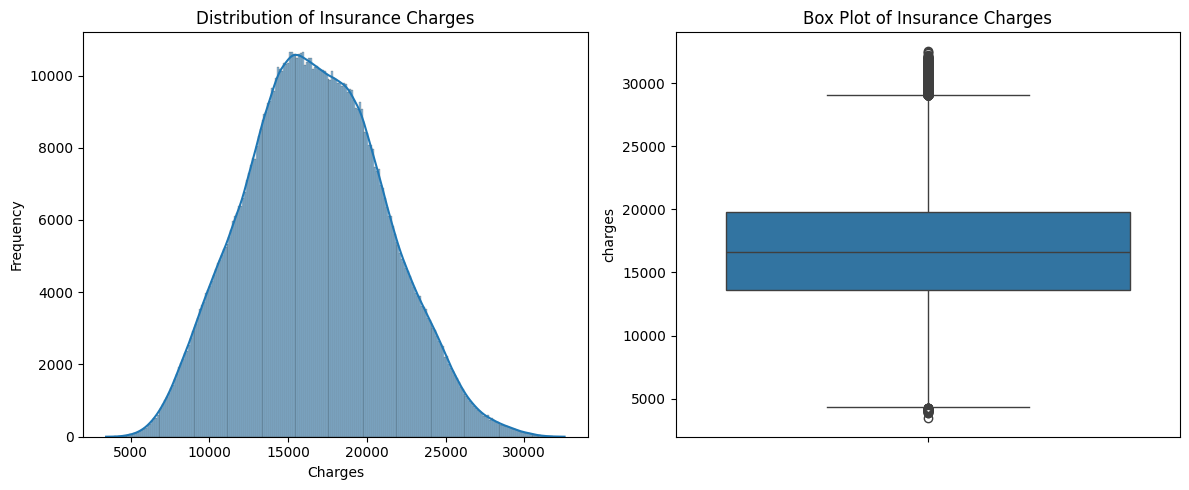

In [16]:
plt.figure(figsize=(12, 5))

# Histogram of Charges
plt.subplot(1, 2, 1)
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Box Plot of Charges
plt.subplot(1, 2, 2)
sns.boxplot(y=df['charges'])
plt.title('Box Plot of Insurance Charges')

plt.tight_layout()
plt.show()

## Key Insights from Distribution
### Histogram Characteristics

- 1.Shape: Right-skewed distribution
    * Most charges concentrated between $5,000-$20,000
    * Long tail extending to higher charges

- 2.Frequency Pattern
    - Peak frequency around $10,000-$15,000
    - Rapidly declining frequencies for higher charges
    - Few insurance plans exceed $25,000


### Box Plot Interpretation

- 1.Central Tendency
    - Median charge: Approximately $15,000
    - 50% of insurance charges fall between $10,000-$20,000


- 2.Variability
    - Significant variation in insurance costs
    - Interquartile range shows most charges cluster around the median


- 3.Outliers
    - Several high-cost outliers
    - Some charges reaching near $30,000
    - Indicates exceptional cases with substantially higher costs

In [17]:
# Descriptive Statistics of Charges
print(df['charges'].describe())

count    1000000.000000
mean       16735.117481
std         4415.808211
min         3445.011643
25%        13600.372379
50%        16622.127973
75%        19781.465410
max        32561.560374
Name: charges, dtype: float64
